# 1.0 Import Library & Packages

In [2]:
# Install and import pandas for parquet files 
!pip install pandas fastparquet
import pandas as pd

# Install folium for data visualization
!pip install folium
import folium

# Import numpy for numerical and mathematical functions
import numpy as np
import math

# Import for date and time handling
from datetime import datetime
from datetime import timedelta

# Import for RNG and selecting random values
import random

# Import matplotlib's pyplot module for interactive visualizations
import matplotlib.pyplot as plt

# Command to display matplotlib plots directly to notebook as inline images
%matplotlib inline

# Import Plotly and enable offline mode
import plotly as py
py.offline.init_notebook_mode(connected = True)

# Import Plotly express for interactive plots
import plotly.express as px

# Import Plotly low lvl API for control over chart customization
import plotly.graph_objects as go

# Import Plotly figure factory module for complex visualization (Eg: Heatmap)
import plotly.figure_factory as ff

# Import make_subplots function for complex layout with multiple charts in one figure
from plotly.subplots import make_subplots

# Import for warning control by suppressing non-critical warnings
import warnings
warnings.filterwarnings('ignore')

# 2.0 Dataset Extraction from KKMNOW 

## Dataset 1: Type of Cases by State

In [5]:
URL_DATA_CASES = 'https://storage.data.gov.my/healthcare/covid_cases.parquet'

df = pd.read_parquet(URL_DATA_CASES)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster
0,2020-01-25,Malaysia,4,4,0,4,0
1,2020-01-26,Malaysia,0,0,0,4,0
2,2020-01-27,Malaysia,0,0,0,4,0
3,2020-01-28,Malaysia,0,0,0,4,0
4,2020-01-29,Malaysia,3,3,0,7,0
...,...,...,...,...,...,...,...
31190,2025-01-28,W.P. Putrajaya,0,0,5,239,0
31191,2025-01-29,W.P. Putrajaya,3,0,1,241,0
31192,2025-01-30,W.P. Putrajaya,0,0,0,241,0
31193,2025-01-31,W.P. Putrajaya,0,0,3,238,0


## Dataset 2: Age Group by State

In [7]:
URL_DATA_AGE = 'https://storage.data.gov.my/healthcare/covid_cases_age.parquet'

df2 = pd.read_parquet(URL_DATA_AGE)
if 'date' in df2.columns: df2['date'] = pd.to_datetime(df2['date'])

df2

,date,state,cases_child,cases_adolescent,cases_adult,cases_elderly,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Malaysia,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2020-01-26,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,Malaysia,1,0,2,0,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31190,2025-01-28,W.P. Putrajaya,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31191,2025-01-29,W.P. Putrajaya,1,0,2,0,0,1,0,0,0,0,2,0,0,0
31192,2025-01-30,W.P. Putrajaya,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31193,2025-01-31,W.P. Putrajaya,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 3.0 Data Preparation 

In [9]:
df = df[['date', 'state', 'cases_new','cases_import','cases_recovered','cases_active']]
df.rename(columns={'cases_new': 'new_cases'},  inplace=True)
df.rename(columns={'cases_import': 'imported_cases'}, inplace=True)
df.rename(columns={'cases_recovered': 'recovered_cases'}, inplace=True)
df.rename(columns={'cases_active': 'active_cases'}, inplace=True)

columns_to_add = ['cases_child','cases_adolescent','cases_adult','cases_elderly']
selected_columns = df2[columns_to_add]
df = pd.concat([df, selected_columns], axis=1)

df.rename(columns={'cases_child': 'child_cases'},  inplace=True)
df.rename(columns={'cases_adolescent': 'adolescent_cases'}, inplace=True)
df.rename(columns={'cases_adult': 'adult_cases'}, inplace=True)
df.rename(columns={'cases_elderly': 'elderly_cases'}, inplace=True)
df

,date,state,new_cases,imported_cases,recovered_cases,active_cases,child_cases,adolescent_cases,adult_cases,elderly_cases
0,2020-01-25,Malaysia,4,4,0,4,0,0,1,0
1,2020-01-26,Malaysia,0,0,0,4,0,0,0,0
2,2020-01-27,Malaysia,0,0,0,4,0,0,0,0
3,2020-01-28,Malaysia,0,0,0,4,0,0,0,0
4,2020-01-29,Malaysia,3,3,0,7,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...
31190,2025-01-28,W.P. Putrajaya,0,0,5,239,0,0,0,0
31191,2025-01-29,W.P. Putrajaya,3,0,1,241,1,0,2,0
31192,2025-01-30,W.P. Putrajaya,0,0,0,241,0,0,0,0
31193,2025-01-31,W.P. Putrajaya,0,0,3,238,0,0,0,0


## 3.1 Addition of New Columns

### 3.1.1 Add Year, Epidemic Week & Start Date Column

In [12]:
# Function to get the start date of the epidemic for each year
def get_epidemic_start_date(year):
    if year == 2020:
        return datetime(year, 1, 25)
    else:
        return datetime(year, 1, 1)

# Function to convert date to epidemic week, restarting each year
def get_epidemic_week(date):
    epidemic_start_date = get_epidemic_start_date(date.year)
    if date < epidemic_start_date:
        return 1
    days_since_start = (date - epidemic_start_date).days
    epidemic_week = days_since_start // 7 + 1
    return epidemic_week

# Apply the function to the 'date' column to get the epidemic week
df['epidemic_week'] = df['date'].apply(get_epidemic_week)

# Create new year column
df['year'] = df['date'].dt.year

# Function to calculate the start date of each epidemic week
def get_week_start(year, epidemic_week):
    if year == 2020:
        first_day_of_year = datetime(year, 1, 25)  
        start_date = first_day_of_year + timedelta(weeks=epidemic_week - 1)
        return start_date
    else:
        first_day_of_year = datetime(year, 1, 1)  
        start_date = first_day_of_year + timedelta(weeks=epidemic_week - 1)
        return start_date

# Apply the function to calculate the start date for each row
df['start_date'] = df.apply(lambda row: get_week_start(row['year'], row['epidemic_week']), axis=1)

# Modify start date to datetime format
df['start_date'] = df['start_date'].dt.strftime('%Y-%m-%d')

# Rearrange the columns
df = df[['date', 'year','epidemic_week', 'start_date','state','new_cases','imported_cases','recovered_cases','active_cases','child_cases','adolescent_cases','adult_cases','elderly_cases']]
df

,date,year,epidemic_week,start_date,state,new_cases,imported_cases,recovered_cases,active_cases,child_cases,adolescent_cases,adult_cases,elderly_cases
0,2020-01-25,2020,1,2020-01-25,Malaysia,4,4,0,4,0,0,1,0
1,2020-01-26,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0
2,2020-01-27,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0
3,2020-01-28,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0
4,2020-01-29,2020,1,2020-01-25,Malaysia,3,3,0,7,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31190,2025-01-28,2025,4,2025-01-22,W.P. Putrajaya,0,0,5,239,0,0,0,0
31191,2025-01-29,2025,5,2025-01-29,W.P. Putrajaya,3,0,1,241,1,0,2,0
31192,2025-01-30,2025,5,2025-01-29,W.P. Putrajaya,0,0,0,241,0,0,0,0
31193,2025-01-31,2025,5,2025-01-29,W.P. Putrajaya,0,0,3,238,0,0,0,0


### 3.1.2 Add MCO Column

In [14]:
# Initialize start and end date of MCO into datetime format
start_mco = datetime.strptime('2020-03-18', '%Y-%m-%d')
end_mco = datetime.strptime('2021-12-31', '%Y-%m-%d')

# Function to get the exact dates for MCO
def dates_of_mco(dates):
    if (dates >= start_mco and dates <= end_mco):
        return 'Yes'
    return 'No'

# Apply the function to get dates of MCO for each row
df['mco'] = df['date'].apply(dates_of_mco)

# Filter date for MCO periods only
df.query('mco == "Yes"')

,date,year,epidemic_week,start_date,state,new_cases,imported_cases,recovered_cases,active_cases,child_cases,adolescent_cases,adult_cases,elderly_cases,mco
53,2020-03-18,2020,8,2020-03-14,Malaysia,117,8,11,728,4,8,78,26,Yes
54,2020-03-19,2020,8,2020-03-14,Malaysia,110,5,15,823,6,7,77,20,Yes
55,2020-03-20,2020,8,2020-03-14,Malaysia,130,6,12,940,2,7,96,22,Yes
56,2020-03-21,2020,9,2020-03-21,Malaysia,153,11,27,1062,7,4,106,33,Yes
57,2020-03-22,2020,9,2020-03-21,Malaysia,123,21,25,1156,2,6,95,20,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30062,2021-12-27,2021,52,2021-12-24,W.P. Putrajaya,11,1,32,407,2,0,8,1,Yes
30063,2021-12-28,2021,52,2021-12-24,W.P. Putrajaya,24,1,21,410,2,2,19,1,Yes
30064,2021-12-29,2021,52,2021-12-24,W.P. Putrajaya,22,3,20,412,4,1,16,1,Yes
30065,2021-12-30,2021,52,2021-12-24,W.P. Putrajaya,25,4,28,409,2,1,20,2,Yes


### 3.1.3 Add Monsoon Season Column

In [16]:
# Function to determine the monsoon season
def monsoon_season(date):
    month = date.month
    if month in [11, 12, 1, 2, 3]:
        return 'Northeast'
    elif month in [5, 6, 7, 8, 9]:
        return 'Southwest'
    else:
        return 'Inter-Monsoon'

# Create a new column 'Monsoon Season' based on the monsoon season
df['monsoon_season'] = df['date'].apply(monsoon_season)
df

,date,year,epidemic_week,start_date,state,new_cases,imported_cases,recovered_cases,active_cases,child_cases,adolescent_cases,adult_cases,elderly_cases,mco,monsoon_season
0,2020-01-25,2020,1,2020-01-25,Malaysia,4,4,0,4,0,0,1,0,No,Northeast
1,2020-01-26,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast
2,2020-01-27,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast
3,2020-01-28,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast
4,2020-01-29,2020,1,2020-01-25,Malaysia,3,3,0,7,1,0,2,0,No,Northeast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31190,2025-01-28,2025,4,2025-01-22,W.P. Putrajaya,0,0,5,239,0,0,0,0,No,Northeast
31191,2025-01-29,2025,5,2025-01-29,W.P. Putrajaya,3,0,1,241,1,0,2,0,No,Northeast
31192,2025-01-30,2025,5,2025-01-29,W.P. Putrajaya,0,0,0,241,0,0,0,0,No,Northeast
31193,2025-01-31,2025,5,2025-01-29,W.P. Putrajaya,0,0,3,238,0,0,0,0,No,Northeast


### 3.1.4 Add Public Holiday Column

In [18]:
# Define holiday dates as sets of datetime objects
cny = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('25/1/2020', '26/1/2020', '12/2/2021', '13/2/2021', '1/2/2022', '2/2/2022', '23/1/2023', '24/1/2023', '10/2/2024', '11/2/2024', '12/2/2024','29/1/2025','30/1/2025')}
labour_day = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('1/5/2020', '1/5/2021', '1/5/2022', '1/5/2023', '1/5/2024','1/5/2025')}
wesak = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('7/5/2020', '26/5/2021', '16/5/2022', '4/5/2023', '22/5/2024','12/5/2025')}
aidilfitri = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('24/5/2020', '25/5/2020', '13/5/2021', '14/5/2021', '1/5/2022', '2/5/2022', '22/4/2023', '23/4/2023', '10/4/2024', '11/4/2024','31/3/2025','1/4/2025')}
ydpa_bday = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('8/6/2020', '7/6/2021', '6/6/2022', '5/6/2023', '3/6/2024','2/6/2025')}
aidiladha = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('31/7/2020', '20/7/2021', '10/7/2022', '29/6/2023', '17/6/2024','6/6/2025','7/6/2025')}
maal_hijrah = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('20/8/2020', '9/8/2021', '10/8/2021', '30/7/2022', '19/7/2023', '7/7/2024','26/6/2025','27/6/2025')}
national_day = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('31/8/2020', '31/8/2021', '31/8/2022', '31/8/2023', '31/8/2024','31/8/2025')}
malaysia_day = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('16/9/2020', '16/9/2021', '16/9/2022', '16/9/2023', '16/9/2024','16/9/2025')}
maulidur_rasul = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('29/10/2020', '19/10/2021', '9/10/2022', '28/9/2023', '16/9/2024','4/9/2025')}
deepavali = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('14/11/2020', '4/11/2021', '24/10/2022', '13/11/2023', '31/10/2024','20/10/2025')}
christmas = {pd.to_datetime(date, format='%d/%m/%Y') for date in ('25/12/2020', '25/12/2021', '25/12/2022', '25/12/2023', '25/12/2024','25/12/2025')}
         
# Convert the date column to a datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Function to determine public holiday type based on date 
def holiday_type(dates):
    if dates in cny:
        return 'Chinese New Year'
    elif dates in labour_day:
        return 'Labour Day'
    elif dates in wesak:
        return 'Wesak Day'
    elif dates in aidilfitri:
        return 'Eid Al-Fitr'
    elif dates in ydpa_bday:
        return 'YDPA Birthday'
    elif dates in aidiladha:
        return 'Eid al-Adha'
    elif dates in maal_hijrah:
        return 'Maal Hijrah'
    elif dates in national_day:
        return 'National Day'
    elif dates in malaysia_day:
        return 'Malaysia Day'
    elif dates in maulidur_rasul:
        return 'Maulidur Rasul'
    elif dates in deepavali:
        return 'Deepavali'
    elif dates in christmas:
        return 'Christmas Day'
    else:
        return 'None'

# Apply the function 
df['public_holiday'] = df['date'].apply(holiday_type)
df

,date,year,epidemic_week,start_date,state,new_cases,imported_cases,recovered_cases,active_cases,child_cases,adolescent_cases,adult_cases,elderly_cases,mco,monsoon_season,public_holiday
0,2020-01-25,2020,1,2020-01-25,Malaysia,4,4,0,4,0,0,1,0,No,Northeast,Chinese New Year
1,2020-01-26,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast,Chinese New Year
2,2020-01-27,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast,None
3,2020-01-28,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast,None
4,2020-01-29,2020,1,2020-01-25,Malaysia,3,3,0,7,1,0,2,0,No,Northeast,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31190,2025-01-28,2025,4,2025-01-22,W.P. Putrajaya,0,0,5,239,0,0,0,0,No,Northeast,None
31191,2025-01-29,2025,5,2025-01-29,W.P. Putrajaya,3,0,1,241,1,0,2,0,No,Northeast,Chinese New Year
31192,2025-01-30,2025,5,2025-01-29,W.P. Putrajaya,0,0,0,241,0,0,0,0,No,Northeast,Chinese New Year
31193,2025-01-31,2025,5,2025-01-29,W.P. Putrajaya,0,0,3,238,0,0,0,0,No,Northeast,None


### 3.1.5 Add School Holiday Column

In [20]:
# Define School holiday periods for multiple years with formatted dates
mid_year = set(pd.date_range(start='2020-05-23', end='2020-06-07').strftime('%d/%m/%Y').to_list() +
               pd.date_range(start='2021-05-29', end='2021-06-13').strftime('%d/%m/%Y').to_list() +
               pd.date_range(start='2023-04-22', end='2023-04-30').strftime('%d/%m/%Y').to_list())

term1 = set(pd.date_range(start='2020-03-14', end='2020-03-22').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2021-03-27', end='2021-04-04').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2022-06-04', end='2022-06-12').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2023-05-27', end='2023-06-04').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2024-05-25', end='2024-06-02').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2025-05-29', end='2025-06-09').strftime('%d/%m/%Y').to_list())
            
term2 = set(pd.date_range(start='2020-08-20', end='2020-08-24').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2021-07-17', end='2021-07-25').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2022-09-03', end='2022-09-11').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2023-08-26', end='2023-09-03').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2024-09-14', end='2024-09-22').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2025-09-13', end='2025-09-21').strftime('%d/%m/%Y').to_list())
               
term3 = set(pd.date_range(start='2021-09-11', end='2021-09-19').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2022-12-10', end='2022-12-31').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2023-12-16', end='2024-01-01').strftime('%d/%m/%Y').to_list() +
            pd.date_range(start='2024-12-21', end='2024-12-29').strftime('%d/%m/%Y').to_list())
               
year_end = set(pd.date_range(start='2020-12-19', end='2020-12-31').strftime('%d/%m/%Y').to_list() +
               pd.date_range(start='2021-12-11', end='2021-12-31').strftime('%d/%m/%Y').to_list() +
               pd.date_range(start='2023-02-18', end='2023-03-12').strftime('%d/%m/%Y').to_list() +
               pd.date_range(start='2024-02-10', end='2024-03-10').strftime('%d/%m/%Y').to_list() +
               pd.date_range(start='2025-01-18', end='2025-02-16').strftime('%d/%m/%Y').to_list())

# Function to determine school holiday type based on date
def scholiday_type(date):
    # Convert date to string format '%d/%m/%Y' for comparison
    date_str = date.strftime('%d/%m/%Y')
    if date_str in mid_year:
        return 'Mid-Year'
    elif date_str in term1:
        return 'Term 1'
    elif date_str in term2:
        return 'Term 2'
    elif date_str in term3:
        return 'Term 3'
    elif date_str in year_end:
        return 'Year-End'
    else:
        return 'None'

# Apply the function 
df['school_holiday'] = df['date'].apply(scholiday_type)
df

,date,year,epidemic_week,start_date,state,new_cases,imported_cases,recovered_cases,active_cases,child_cases,adolescent_cases,adult_cases,elderly_cases,mco,monsoon_season,public_holiday,school_holiday
0,2020-01-25,2020,1,2020-01-25,Malaysia,4,4,0,4,0,0,1,0,No,Northeast,Chinese New Year,None
1,2020-01-26,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast,Chinese New Year,None
2,2020-01-27,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast,None,None
3,2020-01-28,2020,1,2020-01-25,Malaysia,0,0,0,4,0,0,0,0,No,Northeast,None,None
4,2020-01-29,2020,1,2020-01-25,Malaysia,3,3,0,7,1,0,2,0,No,Northeast,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31190,2025-01-28,2025,4,2025-01-22,W.P. Putrajaya,0,0,5,239,0,0,0,0,No,Northeast,None,Year-End
31191,2025-01-29,2025,5,2025-01-29,W.P. Putrajaya,3,0,1,241,1,0,2,0,No,Northeast,Chinese New Year,Year-End
31192,2025-01-30,2025,5,2025-01-29,W.P. Putrajaya,0,0,0,241,0,0,0,0,No,Northeast,Chinese New Year,Year-End
31193,2025-01-31,2025,5,2025-01-29,W.P. Putrajaya,0,0,3,238,0,0,0,0,No,Northeast,None,Year-End


# 4.0 ML Algorithm

## 4.1 Short-Term Forecasting (1 month)

### 4.1.1 Prophet Model

09:41:05 - cmdstanpy - INFO - Chain [1] start processing
09:41:05 - cmdstanpy - INFO - Chain [1] done processing


            ds  yhat  yhat_lower  yhat_upper
179 2025-02-27   0.0         0.0        94.0
180 2025-02-28   0.0         0.0        85.0
181 2025-03-01   0.0         0.0        81.0
182 2025-03-02   0.0         0.0        66.0
183 2025-03-03   0.0         0.0        84.0


                   Evaluation Metrics |  Value 
            Mean Absolute Error (MAE) | 25.6774
Mean Absolute Percentage Error (MAPE) | 23.1851
       Root Mean Squared Error (RMSE) | 34.6587
                       R-squared (R²) |  0.6038




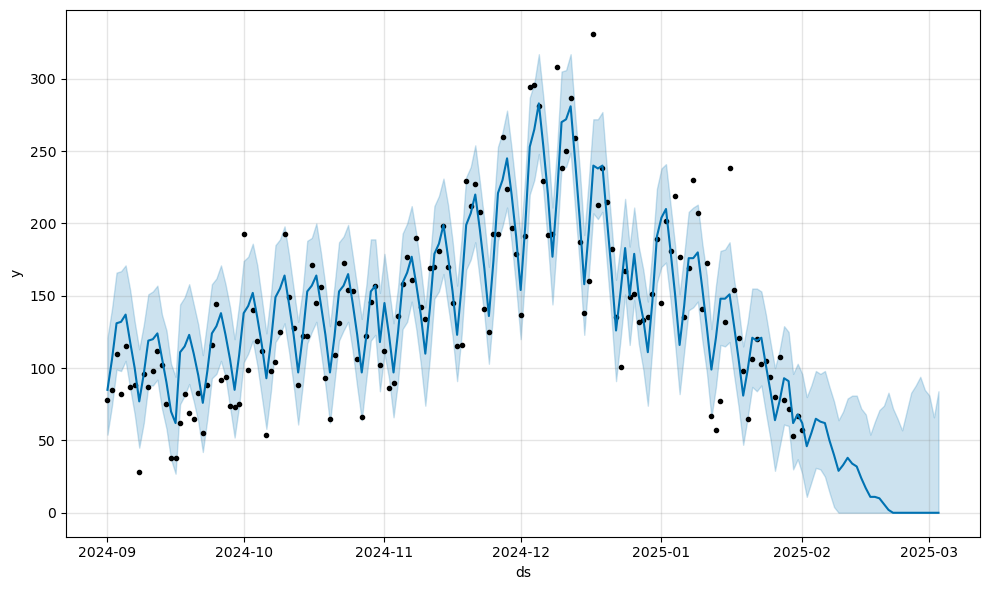

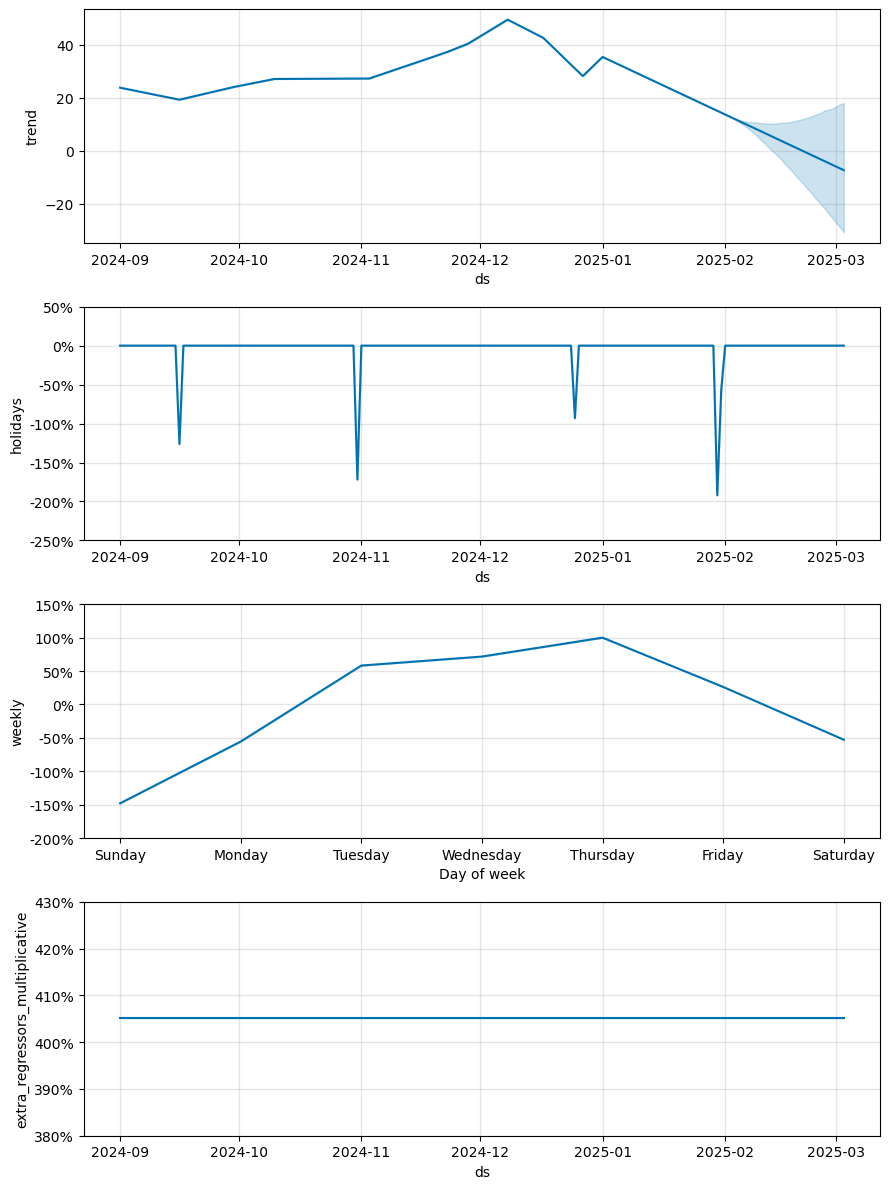

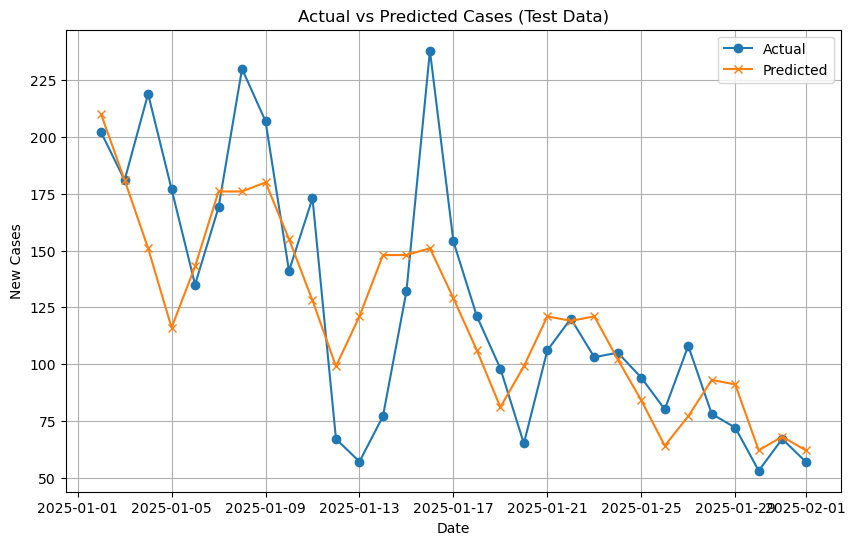

In [24]:
!pip install prophet
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dateutil.relativedelta import relativedelta

# Define holidays with shortform names
holidays = pd.DataFrame({
    'holiday': [
        'CNY 2020', 'CNY 2021', 'CNY 2022', 'CNY 2023', 'CNY 2024', 'CNY 2025', 
        'LD 2020', 'LD 2021', 'LD 2022', 'LD 2023', 'LD 2024', 'LD 2025',         
        'WESAK 2020', 'WESAK 2021', 'WESAK 2022', 'WESAK 2023', 'WESAK 2024', 'WESAK 2025',
        'AF 2020', 'AF 2021', 'AF 2022', 'AF 2023', 'AF 2024', 'AF 2025',
        'YB 2020', 'YB 2021', 'YB 2022', 'YB 2023', 'YB 2024', 'YB 2025',
        'AD 2020', 'AD 2021', 'AD 2022', 'AD 2023', 'AD 2024', 'AD 2025',
        'MH 2020', 'MH 2021', 'MH 2022', 'MH 2023', 'MH 2024', 'MH 2025',
        'ND 2020', 'ND 2021', 'ND 2022', 'ND 2023', 'ND 2024', 'ND 2025',
        'MD 2020', 'MD 2021', 'MD 2022', 'MD 2023', 'MD 2024', 'MD 2025',
        'MR 2020', 'MR 2021', 'MR 2022', 'MR 2023', 'MR 2024', 'MR 2025',
        'DV 2020', 'DV 2021', 'DV 2022', 'DV 2023', 'DV 2024', 'DV 2025',
        'XMAS 2020', 'XMAS 2021', 'XMAS 2022', 'XMAS 2023', 'XMAS 2024', 'XMAS 2025'
    ],
    'ds': pd.to_datetime([
        '25/1/2020', '12/2/2021', '1/2/2022', '23/1/2023', '10/2/2024', '30/1/2025',  
        '1/5/2020', '1/5/2021', '1/5/2022', '1/5/2023', '1/5/2024','1/5/2025',                
        '7/5/2020', '26/5/2021', '16/5/2022', '4/5/2023', '22/5/2024','12/5/2025', 
        '24/5/2020', '13/5/2021', '1/5/2022', '22/4/2023', '10/4/2024', '31/3/2025',
        '8/6/2020', '7/6/2021', '6/6/2022', '5/6/2023', '3/6/2024','2/6/2025',
        '31/7/2020', '20/7/2021', '10/7/2022', '29/6/2023', '17/6/2024','6/6/2025',
        '20/8/2020', '9/8/2021', '30/7/2022', '19/7/2023', '7/7/2024','26/6/2025',
        '31/8/2020', '31/8/2021', '31/8/2022', '31/8/2023', '31/8/2024','31/8/2025',
        '16/9/2020', '16/9/2021', '16/9/2022', '16/9/2023', '16/9/2024','16/9/2025',
        '29/10/2020', '19/10/2021', '9/10/2022', '28/9/2023', '16/9/2024','4/9/2025',
        '14/11/2020', '4/11/2021', '24/10/2022', '13/11/2023', '31/10/2024','20/10/2025',
        '25/12/2020', '25/12/2021', '25/12/2022', '25/12/2023', '25/12/2024','25/12/2025'
    ]),
    'lower_window': [0] * 72,  # Start on the holiday date
    'upper_window': [1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]   # Durations
})

# Filter for Malaysia's data
prophet_data = df[df['state'] == 'Malaysia']
prophet_data = prophet_data[['date', 'new_cases', 'mco', 'monsoon_season', 'public_holiday', 'school_holiday']]

# Rename columns as required by Prophet
prophet_data.rename(columns={"date": "ds", "new_cases": "y"}, inplace=True)

# Ensure the 'ds' column is in datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])

# One-hot encode the 'monsoon_season' column
prophet_data['Northeast'] = (prophet_data['monsoon_season'] == 'Northeast').astype(int)
prophet_data['Southwest'] = (prophet_data['monsoon_season'] == 'Southwest').astype(int)
prophet_data['Inter-Monsoon'] = (prophet_data['monsoon_season'] == 'Inter-Monsoon').astype(int)

# Define the end date as the maximum date in the dataset
end_date = prophet_data['ds'].max()

# Calculate the start date as 5 months before the end date
start_date = end_date - relativedelta(months=5)

# Filter the data based on the calculated date range
prophet_data = prophet_data[(prophet_data['ds'] >= start_date) & (prophet_data['ds'] <= end_date)]

model = Prophet(
    seasonality_mode='multiplicative',
    holidays=holidays,
    seasonality_prior_scale=10.0,  # Increase seasonality flexibility
    holidays_prior_scale=5.0,      # Increase holiday effect
    changepoint_prior_scale=0.5    # Allow larger changes in trend
)

# Add all three monsoon season columns as regressors
model.add_regressor('Northeast')
model.add_regressor('Southwest')
model.add_regressor('Inter-Monsoon')

# Fit the model
model.fit(prophet_data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=30)

future['Northeast'] = prophet_data['Northeast'].iloc[-1]  # Set the last known value for future
future['Southwest'] = prophet_data['Southwest'].iloc[-1]
future['Inter-Monsoon'] = prophet_data['Inter-Monsoon'].iloc[-1]

# Make predictions
prof_forecast = model.predict(future)

# Post-process predictions
prof_forecast['yhat'] = prof_forecast['yhat'].round().clip(lower=0)
prof_forecast['yhat_lower'] = prof_forecast['yhat_lower'].round().clip(lower=0)
prof_forecast['yhat_upper'] = prof_forecast['yhat_upper'].round().clip(lower=0)

# Display predictions
print(prof_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Length of the dataset
data_length = len(prophet_data)

# Define the split point (e.g., 80-20 split, so 80% for training and 20% for testing)
split_index = int(0.8 * data_length)  # 80% for training

# Split the data into train and test sets
train_data = prophet_data[:split_index]  # Use the first 80% of the data for training
test_data = prophet_data[split_index:]   # Use the last 20% of the data for testing

# Merge actual test data with predictions
results = test_data[['ds', 'y']].merge(prof_forecast[['ds', 'yhat']], on='ds')

# Calculate evaluation metrics
prof_mae = mean_absolute_error(results['y'], results['yhat'])
prof_rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
prof_r2 = r2_score(results['y'], results['yhat'])

# Calculate MAPE (handle division by zero for cases where y is zero)
results['abs_percentage_error'] = np.abs((results['y'] - results['yhat']) / results['y'].replace(0, np.nan))
prof_mape = results['abs_percentage_error'].mean() * 100

# Create a dictionary for metrics
metrics = {
    "Evaluation Metrics |": ["Mean Absolute Error (MAE) |", "Mean Absolute Percentage Error (MAPE) |", "Root Mean Squared Error (RMSE) |", "R-squared (R²) |"],
    "Value ": [prof_mae, prof_mape, prof_rmse, prof_r2]
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Add two blank lines before printing the table
print("\n")
print(metrics_df.to_string(index=False, float_format="{:.4f}".format))
print("\n")

# Plot the forecast
model.plot(prof_forecast)
plt.show()

# Plot the forecast components (trend, seasonality, etc.)
model.plot_components(prof_forecast)
plt.show()

# Plot actual vs predicted values (only for the test data)
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['y'], label='Actual', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted Cases (Test Data)')
plt.legend()
plt.grid()
plt.show()

### 4.1.2 Holt's Winter Model



                   Evaluation Metrics |  Value 
            Mean Absolute Error (MAE) | 60.7097
Mean Absolute Percentage Error (MAPE) | 69.0600
       Root Mean Squared Error (RMSE) | 68.1620
                       R-squared (R²) | -0.5326




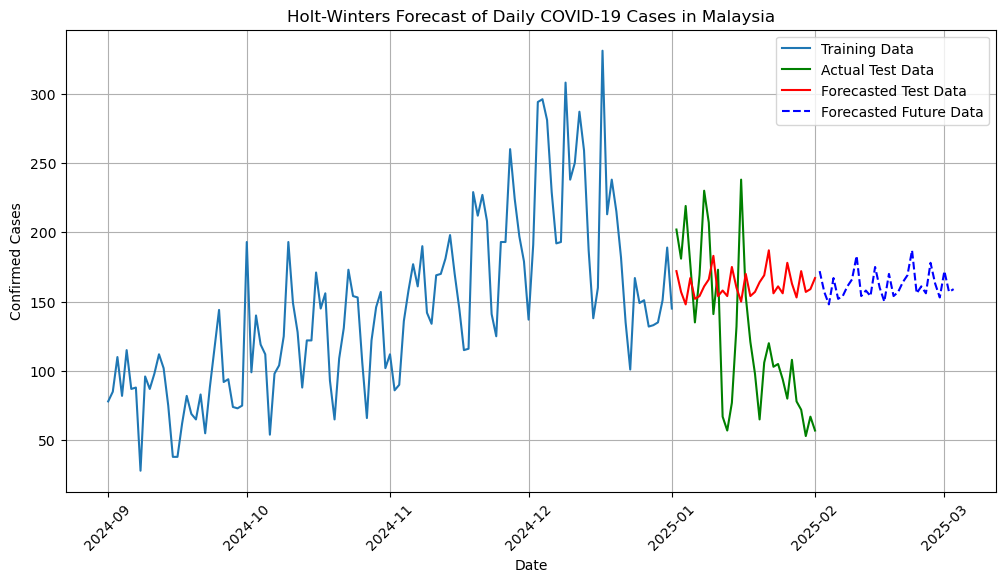

In [26]:
!pip install pandas statsmodels matplotlib scikit-learn
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from math import sqrt
from sklearn.metrics import mean_absolute_error, r2_score

# Filter for Malaysia's data
hw_data = df[df['state'] == 'Malaysia']
hw_data = hw_data[['date', 'new_cases']]

# Define the end date as the maximum date in the dataset
end_date = hw_data['date'].max()
# Calculate the start date as 5 months before the end date
start_date = end_date - relativedelta(months=5)

# Filter the data based on the calculated date range
hw_data = hw_data[(hw_data['date'] >= start_date) & (hw_data['date'] <= end_date)]

# Ensure 'date' is parsed correctly and set as index
hw_data['date'] = pd.to_datetime(hw_data['date'])
hw_data.set_index('date', inplace=True)
hw_data = hw_data.asfreq('D') 

# Split data into 80% training and 20% test
train_size = int(len(hw_data) * 0.8)
train, test = hw_data[:train_size], hw_data[train_size:]

# Fit Holt-Winters Exponential Smoothing Model to training data
model = ExponentialSmoothing(train['new_cases'], 
                              trend='mul',  # Options: 'add' or 'mul' for additive or multiplicative trend
                              seasonal='mul',  # Options: 'add' or 'mul' for seasonal effect
                              seasonal_periods=12)  # Set this to the number of periods in a season (e.g., 12 months)
fitted_model = model.fit()

# Forecast on the test data
forecast_steps = len(test)  # Forecast the same number of steps as the length of the test set
hw_forecast = fitted_model.forecast(steps=forecast_steps)

# Define the number of future steps you want to forecast (e.g., 30 days)
future_steps = 30  # Forecast the next 30 days
future_forecast = fitted_model.forecast(steps=future_steps)

# Generate future dates for plotting (continuing from the last date of the current dataset)
last_date = hw_data.index[-1]  # Get the last date in the original data
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='D')[1:]  # Get future dates

# Adjust forecasted values to avoid negative values and decimals
hw_forecast = np.maximum(np.round(hw_forecast), 0)  # Round and set negative forecasts to zero
future_forecast = np.maximum(np.round(future_forecast), 0)  # Round and set negative forecasts to zero

# Calculate performance metrics
hw_mae = mean_absolute_error(test['new_cases'], hw_forecast)

# MAPE Calculation
hw_mape = np.mean(np.abs((test['new_cases'] - hw_forecast) / test['new_cases'])) * 100  # MAPE in percentage

hw_rmse = sqrt(mean_squared_error(test['new_cases'], hw_forecast))  # RMSE calculation
hw_r2 = r2_score(test['new_cases'], hw_forecast)

# Create a dictionary for metrics
metrics = {
    "Evaluation Metrics |": ["Mean Absolute Error (MAE) |", "Mean Absolute Percentage Error (MAPE) |", "Root Mean Squared Error (RMSE) |", "R-squared (R²) |"],
    "Value ": [hw_mae, hw_mape, hw_rmse, hw_r2]
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Add two blank lines before printing the table
print("\n")
print(metrics_df.to_string(index=False, float_format="{:.4f}".format))
print("\n")

# Plot the actual vs predicted values (including both training and test data, plus future predictions)
plt.figure(figsize=(12,6))
plt.plot(hw_data.index[:train_size], train['new_cases'], label='Training Data')
plt.plot(hw_data.index[train_size:], test['new_cases'], label='Actual Test Data', color='green')
plt.plot(hw_data.index[train_size:], hw_forecast, label='Forecasted Test Data', color='red')
plt.plot(future_dates, future_forecast, label='Forecasted Future Data', color='blue', linestyle='dashed')

plt.legend(loc='best')
plt.title('Holt-Winters Forecast of Daily COVID-19 Cases in Malaysia')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4.1.3 Model Comparison

In [28]:
prophet_model = 0
holtswinter_model = 0

if prof_mae < hw_mae:
    prophet_model += 1
else:
    holtswinter_model += 1

if prof_mape < hw_mape:
    prophet_model += 1
else:
    holtswinter_model += 1

if prof_rmse < hw_rmse:
    prophet_model += 1
else:
    holtswinter_model += 1

if prof_r2 > hw_r2:
    prophet_model += 1
else:
    holtswinter_model += 1

if prophet_model > holtswinter_model:
    # Create a new dataframe with date, actual cases, and predicted cases
    df3 = results[['ds', 'y', 'yhat']].copy()
    df4 = prof_forecast[['ds','yhat']].copy()
    
    # Rename the columns for better clarity
    df3.rename(columns={
        'ds': 'date',
        'y': 'actual_cases',
        'yhat': 'predicted_cases'
    }, inplace=True)

    df4.rename(columns={
        'ds': 'date',
        'yhat': 'future_cases'
    }, inplace=True)
    
    # Display the dataframe
    print("\nBest Model is Prophet!\n")
    print("Actual Cases vs Predicted Cases(Test Data):")
    print(df3)
    print("\nPredicted and Future Cases Over Time:")
    print(df4)
else:
   # Create a DataFrame for the test data with actual and predicted values
    df3 = pd.DataFrame({
        "date": test.index,  # Dates from the test set
        "actual_cases": test['new_cases'].values,  # Actual cases from the test set
        "predicted_cases": hw_forecast  # Forecasted cases for the test set
    }).reset_index(drop=True)  # Reset index to avoid duplication in the 'date' column
    
    # Create a DataFrame for future forecasted values (only date and predicted values)
    df4 = pd.DataFrame({
        "date": future_dates,  # Unique future dates
        "future_cases": future_forecast  # Forecasted cases for the future
    }).reset_index(drop=True)  # Reset index to avoid duplication in the 'date' column
    
    # Display the first few rows of each DataFrame to confirm
    print("\nBest Model is Holt's Winter!\n")
    print("Actual Cases vs Predicted Cases(Test Data):")
    print(df3)
    print("\nFuture Forecast Cases:")
    print(df4)



Best Model is Prophet!

Actual Cases vs Predicted Cases(Test Data):
         date  actual_cases  predicted_cases
0  2025-01-02           202            210.0
1  2025-01-03           181            181.0
2  2025-01-04           219            151.0
3  2025-01-05           177            116.0
4  2025-01-06           135            143.0
5  2025-01-07           169            176.0
6  2025-01-08           230            176.0
7  2025-01-09           207            180.0
8  2025-01-10           141            155.0
9  2025-01-11           173            128.0
10 2025-01-12            67             99.0
11 2025-01-13            57            121.0
12 2025-01-14            77            148.0
13 2025-01-15           132            148.0
14 2025-01-16           238            151.0
15 2025-01-17           154            129.0
16 2025-01-18           121            106.0
17 2025-01-19            98             81.0
18 2025-01-20            65             99.0
19 2025-01-21           106    

## 4.2 Long-Term Forecasting (1 year)

### 4.2.1 Prophet Model

09:41:34 - cmdstanpy - INFO - Chain [1] start processing
09:41:49 - cmdstanpy - INFO - Chain [1] done processing


             ds   yhat  yhat_lower  yhat_upper
1860 2025-02-27  203.0         0.0      1638.0
1861 2025-02-28  204.0         0.0      1513.0
1862 2025-03-01  198.0         0.0      1556.0
1863 2025-03-02  185.0         0.0      1631.0
1864 2025-03-03  177.0         0.0      1636.0


                   Evaluation Metrics |   Value 
            Mean Absolute Error (MAE) | 122.7657
Mean Absolute Percentage Error (MAPE) | 105.3682
       Root Mean Squared Error (RMSE) | 155.6953
                       R-squared (R²) |  -0.6019




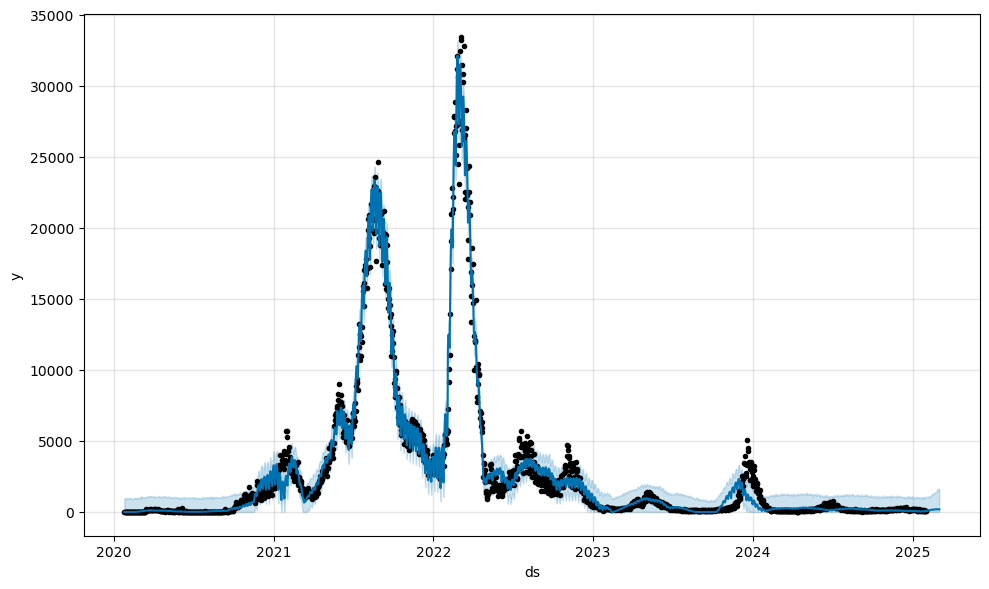

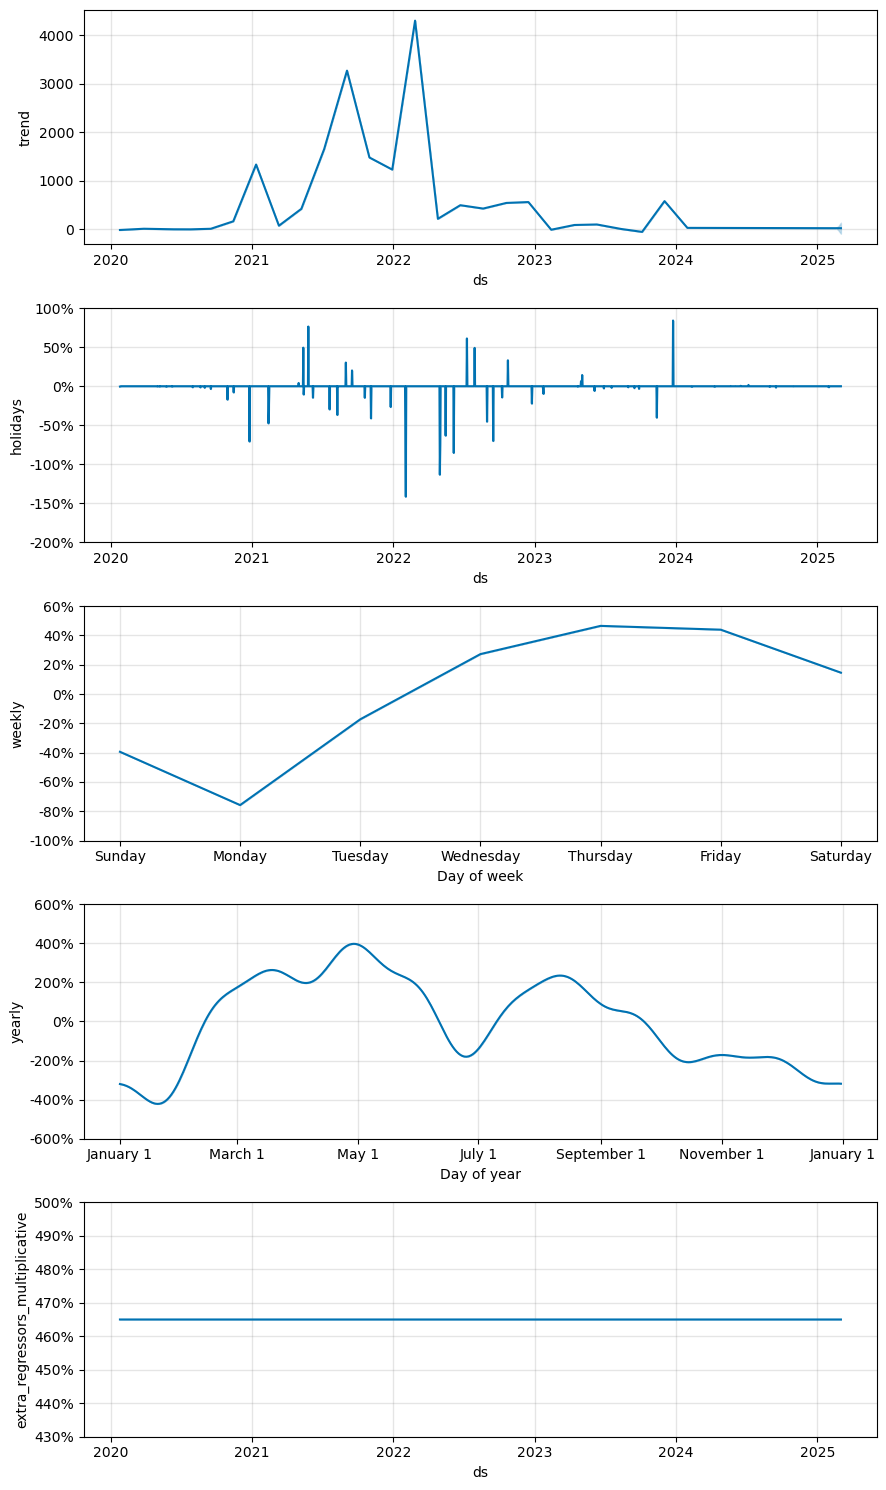

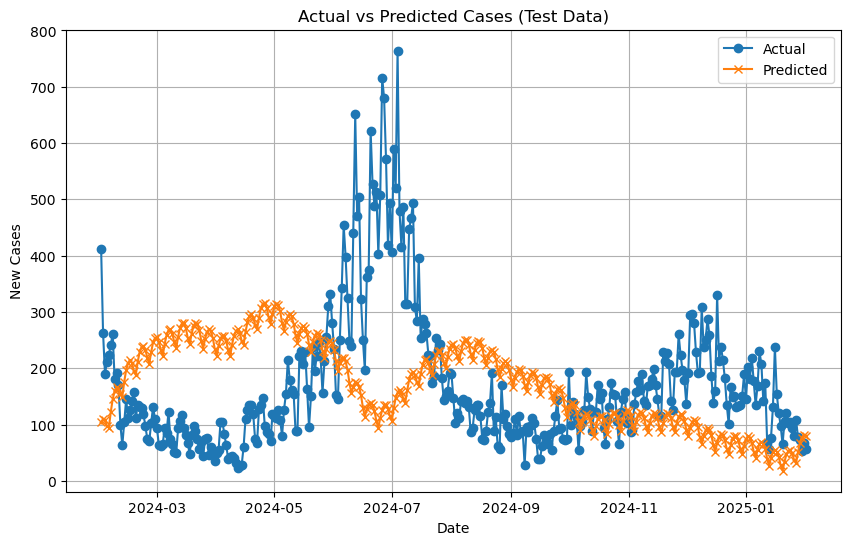

In [31]:
# Define holidays with shortform names
holidays = pd.DataFrame({
    'holiday': [
        'CNY 2020', 'CNY 2021', 'CNY 2022', 'CNY 2023', 'CNY 2024', 'CNY 2025', 
        'LD 2020', 'LD 2021', 'LD 2022', 'LD 2023', 'LD 2024', 'LD 2025',         
        'WESAK 2020', 'WESAK 2021', 'WESAK 2022', 'WESAK 2023', 'WESAK 2024', 'WESAK 2025',
        'AF 2020', 'AF 2021', 'AF 2022', 'AF 2023', 'AF 2024', 'AF 2025',
        'YB 2020', 'YB 2021', 'YB 2022', 'YB 2023', 'YB 2024', 'YB 2025',
        'AD 2020', 'AD 2021', 'AD 2022', 'AD 2023', 'AD 2024', 'AD 2025',
        'MH 2020', 'MH 2021', 'MH 2022', 'MH 2023', 'MH 2024', 'MH 2025',
        'ND 2020', 'ND 2021', 'ND 2022', 'ND 2023', 'ND 2024', 'ND 2025',
        'MD 2020', 'MD 2021', 'MD 2022', 'MD 2023', 'MD 2024', 'MD 2025',
        'MR 2020', 'MR 2021', 'MR 2022', 'MR 2023', 'MR 2024', 'MR 2025',
        'DV 2020', 'DV 2021', 'DV 2022', 'DV 2023', 'DV 2024', 'DV 2025',
        'XMAS 2020', 'XMAS 2021', 'XMAS 2022', 'XMAS 2023', 'XMAS 2024', 'XMAS 2025'
    ],
    'ds': pd.to_datetime([
        '25/1/2020', '12/2/2021', '1/2/2022', '23/1/2023', '10/2/2024', '30/1/2025',  
        '1/5/2020', '1/5/2021', '1/5/2022', '1/5/2023', '1/5/2024','1/5/2025',                
        '7/5/2020', '26/5/2021', '16/5/2022', '4/5/2023', '22/5/2024','12/5/2025', 
        '24/5/2020', '13/5/2021', '1/5/2022', '22/4/2023', '10/4/2024', '31/3/2025',
        '8/6/2020', '7/6/2021', '6/6/2022', '5/6/2023', '3/6/2024','2/6/2025',
        '31/7/2020', '20/7/2021', '10/7/2022', '29/6/2023', '17/6/2024','6/6/2025',
        '20/8/2020', '9/8/2021', '30/7/2022', '19/7/2023', '7/7/2024','26/6/2025',
        '31/8/2020', '31/8/2021', '31/8/2022', '31/8/2023', '31/8/2024','31/8/2025',
        '16/9/2020', '16/9/2021', '16/9/2022', '16/9/2023', '16/9/2024','16/9/2025',
        '29/10/2020', '19/10/2021', '9/10/2022', '28/9/2023', '16/9/2024','4/9/2025',
        '14/11/2020', '4/11/2021', '24/10/2022', '13/11/2023', '31/10/2024','20/10/2025',
        '25/12/2020', '25/12/2021', '25/12/2022', '25/12/2023', '25/12/2024','25/12/2025'
    ]),
    'lower_window': [0] * 72,  # Start on the holiday date
    'upper_window': [1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]   # Durations
})

# Filter for Malaysia's data
prophet_data = df[df['state'] == 'Malaysia']
prophet_data = prophet_data[['date', 'new_cases', 'mco', 'monsoon_season', 'public_holiday', 'school_holiday']]

# Rename columns as required by Prophet
prophet_data.rename(columns={"date": "ds", "new_cases": "y"}, inplace=True)

# Ensure the 'ds' column is in datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'])

# One-hot encode the 'monsoon_season' column
prophet_data['Northeast'] = (prophet_data['monsoon_season'] == 'Northeast').astype(int)
prophet_data['Southwest'] = (prophet_data['monsoon_season'] == 'Southwest').astype(int)
prophet_data['Inter-Monsoon'] = (prophet_data['monsoon_season'] == 'Inter-Monsoon').astype(int)

# Define the start and end date for the range
start_date = prophet_data['ds'].min()
end_date = prophet_data['ds'].max()

# Filter the data based on the date range
prophet_data = prophet_data[(prophet_data['ds'] >= start_date) & (prophet_data['ds'] <= end_date)]

model = Prophet(
    seasonality_mode='multiplicative',
    holidays=holidays,
    seasonality_prior_scale=10.0,  # Increase seasonality flexibility
    holidays_prior_scale=5.0,      # Increase holiday effect
    changepoint_prior_scale=0.5    # Allow larger changes in trend
)

# Add all three monsoon season columns as regressors
model.add_regressor('Northeast')
model.add_regressor('Southwest')
model.add_regressor('Inter-Monsoon')

# Fit the model
model.fit(prophet_data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=30)

future['Northeast'] = prophet_data['Northeast'].iloc[-1]  # Set the last known value for future
future['Southwest'] = prophet_data['Southwest'].iloc[-1]
future['Inter-Monsoon'] = prophet_data['Inter-Monsoon'].iloc[-1]

# Make predictions
prof_forecast = model.predict(future)

# Post-process predictions
prof_forecast['yhat'] = prof_forecast['yhat'].round().clip(lower=0)
prof_forecast['yhat_lower'] = prof_forecast['yhat_lower'].round().clip(lower=0)
prof_forecast['yhat_upper'] = prof_forecast['yhat_upper'].round().clip(lower=0)

# Display predictions
print(prof_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Length of the dataset
data_length = len(prophet_data)

# Define the split point (e.g., 80-20 split, so 80% for training and 20% for testing)
split_index = int(0.8 * data_length)  # 80% for training

# Split the data into train and test sets
train_data = prophet_data[:split_index]  # Use the first 80% of the data for training
test_data = prophet_data[split_index:]   # Use the last 20% of the data for testing

# Merge actual test data with predictions
results = test_data[['ds', 'y']].merge(prof_forecast[['ds', 'yhat']], on='ds')

# Calculate evaluation metrics
prof_mae = mean_absolute_error(results['y'], results['yhat'])
prof_rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))
prof_r2 = r2_score(results['y'], results['yhat'])

# Calculate MAPE (handle division by zero for cases where y is zero)
results['abs_percentage_error'] = np.abs((results['y'] - results['yhat']) / results['y'].replace(0, np.nan))
prof_mape = results['abs_percentage_error'].mean() * 100

# Create a dictionary for metrics
metrics = {
    "Evaluation Metrics |": ["Mean Absolute Error (MAE) |", "Mean Absolute Percentage Error (MAPE) |", "Root Mean Squared Error (RMSE) |", "R-squared (R²) |"],
    "Value ": [prof_mae, prof_mape, prof_rmse, prof_r2]
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Add two blank lines before printing the table
print("\n")
print(metrics_df.to_string(index=False, float_format="{:.4f}".format))
print("\n")

# Plot the forecast
model.plot(prof_forecast)
plt.show()

# Plot the forecast components (trend, seasonality, etc.)
model.plot_components(prof_forecast)
plt.show()

# Plot actual vs predicted values (only for the test data)
plt.figure(figsize=(10, 6))
plt.plot(results['ds'], results['y'], label='Actual', marker='o')
plt.plot(results['ds'], results['yhat'], label='Predicted', marker='x')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('Actual vs Predicted Cases (Test Data)')
plt.legend()
plt.grid()
plt.show()

### 4.2.2 Holt's Winter Model

C:\Users\ayman\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.





                   Evaluation Metrics |   Value 
            Mean Absolute Error (MAE) | 290.1907
Mean Absolute Percentage Error (MAPE) | 296.1037
       Root Mean Squared Error (RMSE) | 305.5475
                       R-squared (R²) |  -5.1696




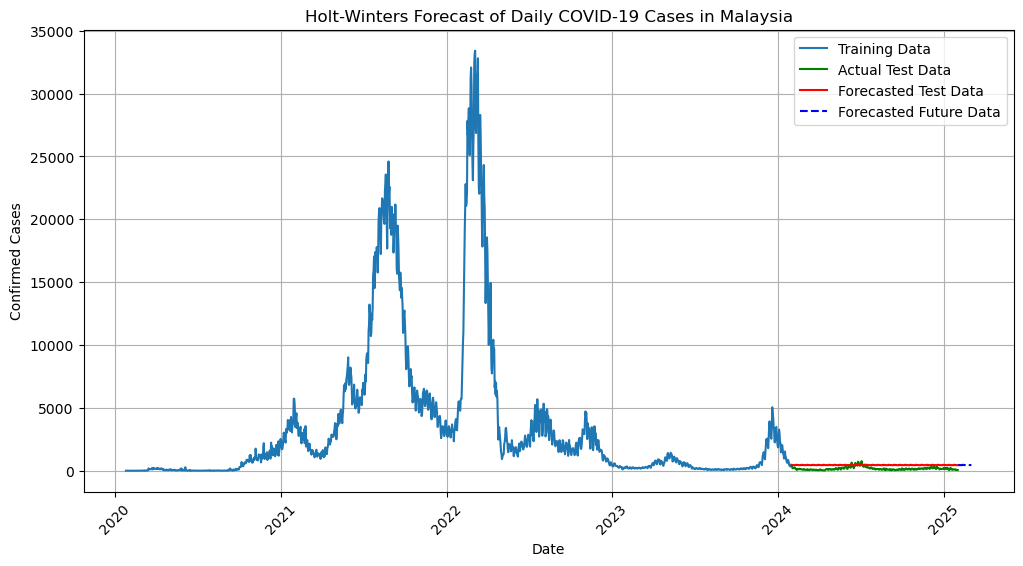

In [33]:
# Filter for Malaysia's data
hw_data = df[df['state'] == 'Malaysia']
hw_data = hw_data[['date', 'new_cases']]

# Define the start and end date for the range
start_date = hw_data['date'].min()
end_date = hw_data['date'].max()

# Filter the data based on the calculated date range
hw_data = hw_data[(hw_data['date'] >= start_date) & (hw_data['date'] <= end_date)]

# Ensure 'date' is parsed correctly and set as index
hw_data['date'] = pd.to_datetime(hw_data['date'])
hw_data.set_index('date', inplace=True)
hw_data = hw_data.asfreq('D') 

# Split data into 80% training and 20% test
train_size = int(len(hw_data) * 0.8)
train, test = hw_data[:train_size], hw_data[train_size:]

# Fit Holt-Winters Exponential Smoothing Model to training data
model = ExponentialSmoothing(train['new_cases'], 
                              trend='add',  # Options: 'add' or 'mul' for additive or multiplicative trend
                              seasonal='add',  # Options: 'add' or 'mul' for seasonal effect
                              seasonal_periods=12)  # Set this to the number of periods in a season (e.g., 12 months)
fitted_model = model.fit()

# Forecast on the test data
forecast_steps = len(test)  # Forecast the same number of steps as the length of the test set
hw_forecast = fitted_model.forecast(steps=forecast_steps)

# Define the number of future steps you want to forecast (e.g., 30 days)
future_steps = 30  # Forecast the next 30 days
future_forecast = fitted_model.forecast(steps=future_steps)

# Generate future dates for plotting (continuing from the last date of the current dataset)
last_date = hw_data.index[-1]  # Get the last date in the original data
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='D')[1:]  # Get future dates

# Adjust forecasted values to avoid negative values and decimals
hw_forecast = np.maximum(np.round(hw_forecast), 0)  # Round and set negative forecasts to zero
future_forecast = np.maximum(np.round(future_forecast), 0)  # Round and set negative forecasts to zero

# Calculate performance metrics
hw_mae = mean_absolute_error(test['new_cases'], hw_forecast)

# MAPE Calculation
hw_mape = np.mean(np.abs((test['new_cases'] - hw_forecast) / test['new_cases'])) * 100  # MAPE in percentage

hw_rmse = sqrt(mean_squared_error(test['new_cases'], hw_forecast))  # RMSE calculation
hw_r2 = r2_score(test['new_cases'], hw_forecast)

# Create a dictionary for metrics
metrics = {
    "Evaluation Metrics |": ["Mean Absolute Error (MAE) |", "Mean Absolute Percentage Error (MAPE) |", "Root Mean Squared Error (RMSE) |", "R-squared (R²) |"],
    "Value ": [hw_mae, hw_mape, hw_rmse, hw_r2]
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics)

# Add two blank lines before printing the table
print("\n")
print(metrics_df.to_string(index=False, float_format="{:.4f}".format))
print("\n")

# Plot the actual vs predicted values (including both training and test data, plus future predictions)
plt.figure(figsize=(12,6))
plt.plot(hw_data.index[:train_size], train['new_cases'], label='Training Data')
plt.plot(hw_data.index[train_size:], test['new_cases'], label='Actual Test Data', color='green')
plt.plot(hw_data.index[train_size:], hw_forecast, label='Forecasted Test Data', color='red')
plt.plot(future_dates, future_forecast, label='Forecasted Future Data', color='blue', linestyle='dashed')

plt.legend(loc='best')
plt.title('Holt-Winters Forecast of Daily COVID-19 Cases in Malaysia')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 4.2.3 Model Comparison

In [35]:
prophet_model = 0
holtswinter_model = 0

if prof_mae < hw_mae:
    prophet_model += 1
else:
    holtswinter_model += 1

if prof_mape < hw_mape:
    prophet_model += 1
else:
    holtswinter_model += 1

if prof_rmse < hw_rmse:
    prophet_model += 1
else:
    holtswinter_model += 1

if prof_r2 > hw_r2:
    prophet_model += 1
else:
    holtswinter_model += 1

if prophet_model > holtswinter_model:
    # Create a new dataframe with date, actual cases, and predicted cases
    df5 = results[['ds', 'y', 'yhat']].copy()
    df6 = prof_forecast[['ds','yhat']].copy()
    
    # Rename the columns for better clarity
    df5.rename(columns={
        'ds': 'date',
        'y': 'actual_cases',
        'yhat': 'predicted_cases'
    }, inplace=True)

    df6.rename(columns={
        'ds': 'date',
        'yhat': 'future_cases'
    }, inplace=True)
    
    # Display the dataframe
    print("\nBest Model is Prophet!\n")
    print("Actual Cases vs Predicted Cases(Test Data):")
    print(df5)
    print("\nPredicted and Future Cases Over Time:")
    print(df6)
else:
   # Create a DataFrame for the test data with actual and predicted values
    df5 = pd.DataFrame({
        "date": test.index,  # Dates from the test set
        "actual_cases": test['new_cases'].values,  # Actual cases from the test set
        "predicted_cases": hw_forecast  # Forecasted cases for the test set
    }).reset_index(drop=True)  # Reset index to avoid duplication in the 'date' column
    
    # Create a DataFrame for future forecasted values (only date and predicted values)
    df6 = pd.DataFrame({
        "date": future_dates,  # Unique future dates
        "future_cases": future_forecast  # Forecasted cases for the future
    }).reset_index(drop=True)  # Reset index to avoid duplication in the 'date' column
    
    # Display the first few rows of each DataFrame to confirm
    print("\nBest Model is Holt's Winter!\n")
    print("Actual Cases vs Predicted Cases(Test Data):")
    print(df5)
    print("\nFuture Forecast Cases:")
    print(df6)



Best Model is Prophet!

Actual Cases vs Predicted Cases(Test Data):
          date  actual_cases  predicted_cases
0   2024-02-01           412            104.0
1   2024-02-02           263            110.0
2   2024-02-03           190            108.0
3   2024-02-04           211             98.0
4   2024-02-05           224             94.0
..         ...           ...              ...
362 2025-01-28            78             51.0
363 2025-01-29            72             67.0
364 2025-01-30            53             77.0
365 2025-01-31            67             82.0
366 2025-02-01            57             80.0

[367 rows x 3 columns]

Predicted and Future Cases Over Time:
           date  future_cases
0    2020-01-25           0.0
1    2020-01-26           0.0
2    2020-01-27           0.0
3    2020-01-28           0.0
4    2020-01-29           0.0
...         ...           ...
1860 2025-02-27         203.0
1861 2025-02-28         204.0
1862 2025-03-01         198.0
1863 2025-03-02 

# 5.0 Save Processed Data & Run Tableau Dashboard

In [37]:
import os

# Save updated CSV
df.to_csv(os.path.join(os.getcwd(), 'covid19_processed_data.csv'), index=False)
df3.to_csv(os.path.join(os.getcwd(), 'covid19_shortterm_predicted_data.csv'), index=False)
df4.to_csv(os.path.join(os.getcwd(), 'covid19_shortterm_future_data.csv'), index=False)
df5.to_csv(os.path.join(os.getcwd(), 'covid19_longterm_predicted_data.csv'), index=False)
df6.to_csv(os.path.join(os.getcwd(), 'covid19_longterm_future_data.csv'), index=False)
print("The Covid 19 Datasets have been updated.")

The Covid 19 Datasets have been updated.


In [38]:
# Open Tableau workbook
workbook_path = os.path.join(os.getcwd(), "Covid19_Dashboard.twb")

if os.path.exists(workbook_path):
    os.startfile(workbook_path)
    print(f"Tableau workbook Covid19_Dashboard.twb opened.")
else:
    print(f"Workbook Covid19_Dashboard.twb not found!")

Tableau workbook Covid19_Dashboard.twb opened.
